In [1]:
import torch 
import torchvision
from torchvision import transforms, datasets

In [7]:
train = datasets.MNIST('', train=True,
                      download=True,
                      transform= transforms.Compose(
                      [transforms.ToTensor()]))

test = datasets.MNIST('', train=False,
                      download=True,
                      transform= transforms.Compose(
                      [transforms.ToTensor()]))

In [8]:
trainset = torch.utils.data.DataLoader(train, 
                                       batch_size=10, 
                                      shuffle=True)
testset = torch.utils.data.DataLoader(test, 
                                       batch_size=10, 
                                      shuffle=True)

In [9]:
for i in trainset:
    print(i)
    break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [11]:
X, y = i[0][0], i[1][0];y

tensor(0)

In [12]:
import matplotlib.pyplot as plt

In [14]:
X[0].shape

torch.Size([28, 28])

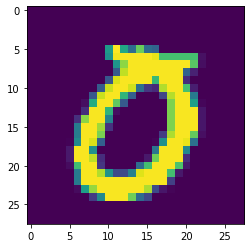

In [16]:
plt.imshow(X[0])
plt.show()

In [18]:
total = 0
counter = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0}

for i in trainset:
    Xs, ys = i
    for y in ys:
        counter[int(y)] +=1
        total+=1
print(counter)

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [19]:
for i in counter:
    print(f'{i}: {counter[i]/total*100}')

0: 9.871666666666666
1: 11.236666666666666
2: 9.93
3: 10.218333333333334
4: 9.736666666666666
5: 9.035
6: 9.863333333333333
7: 10.441666666666666
8: 9.751666666666667
9: 9.915000000000001


In [25]:
import torch.nn as nn
import torch.nn.functional as F

In [26]:
class LinNets(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return F.log_softmax(x, dim=1)
    
net = LinNets()
net

LinNets(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)

In [27]:
X = torch.rand(28,28)
X = X.reshape(-1,28*28)

In [28]:
output = net(X)

In [29]:
output

tensor([[-2.3579, -2.2980, -2.2567, -2.3681, -2.2634, -2.1955, -2.4556, -2.2749,
         -2.2847, -2.2941]], grad_fn=<LogSoftmaxBackward>)

In [30]:
import torch.optim as optim

In [33]:
optimiser = optim.Adam(net.parameters(), lr=0.01)

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        X,y = data
        net.zero_grad()
        output = net(X.reshape(-1,28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimiser.step()
    print(loss)
         

tensor(0.3841, grad_fn=<NllLossBackward>)
tensor(0.8639, grad_fn=<NllLossBackward>)
tensor(0.0642, grad_fn=<NllLossBackward>)


In [34]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X,y = data
        output = net(X.reshape(-1,28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i)==y[idx]:
                correct +=1
            total +=1
print('Accuracy: ', round(correct/total, 3))

Accuracy:  0.94


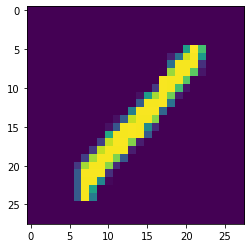

In [35]:
plt.imshow(X[0].reshape(28,28))
plt.show()

In [36]:
print(torch.argmax(net(X[0].reshape(-1, 784))[0]))

tensor(1)


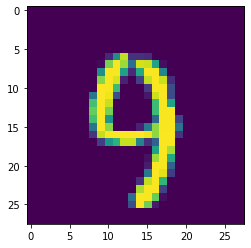

In [37]:
plt.imshow(X[1].reshape(28,28))
plt.show()

In [38]:
print(torch.argmax(net(X[1].reshape(-1, 784))[0]))

tensor(9)


In [42]:
#how argmax works--returns the maximum number in a list
torch.argmax(torch.tensor([1,3,5]))

tensor(2)